In [28]:
from fastbook import *
from fastai.tabular.all import *
import os
import nfl_data_py as nfl
import numpy as np
import pandas as pd

In [2]:
# Calculate Expected Pass Rate

In [20]:
# Set CONSTANTS
SEASONS = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
SEASONS = [2015,2016,2017,2018,2019]

In [21]:
# get play by play for season
cols = ['game_id',
        'play_id',
        'epa',
        'season_type',
        'season','week',
        'qtr',
        'drive','series',
        'down',
        'ydstogo',
        'yards_gained',
        'wp',
        'ep',
        'yardline_100',
        'home_team',
        'away_team',
        'posteam','posteam_score',
        'defteam','defteam_score',
        'posteam_timeouts_remaining',
        'defteam_timeouts_remaining',
        'half_seconds_remaining',
        'game_half',
        'fixed_drive_result',
        'play_type',
        'penalty_team',
        'penalty_type',
        'penalty_yards']

df_pbp = nfl.import_pbp_data(years=SEASONS, columns=cols, downcast=True, cache=False)

2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
Downcasting floats.


In [24]:
df_pbp['score_diff'] = df_pbp.posteam_score - df_pbp.defteam_score
df_pbp['home'] = np.select([df_pbp.posteam == df_pbp.home_team],[1], default=0) 

In [49]:
is_down = df_pbp['down'].isin([1,2,3,4])
is_runpass = df_pbp['play_type'].isin(['run','pass'])


df = df_pbp.loc[(is_runpass & is_down), ['play_type','season','season_type','score_diff','home','down','ydstogo','yardline_100','game_half','qtr','half_seconds_remaining','wp']].copy()
print(df.play_type.value_counts())
df.sample(25)

pass    99584
run     67987
Name: play_type, dtype: int64


,play_type,season,season_type,score_diff,home,down,ydstogo,yardline_100,game_half,qtr,half_seconds_remaining,wp
147763,pass,2018,REG,0.0,1,1.0,10.0,56.0,Half1,1.0,1377.0,0.579976
163242,pass,2018,REG,-25.0,1,1.0,10.0,75.0,Half1,2.0,880.0,0.030119
80515,pass,2016,REG,9.0,1,1.0,10.0,61.0,Half1,2.0,555.0,0.832236
129153,run,2017,REG,14.0,1,1.0,10.0,47.0,Half2,4.0,535.0,0.985200
847,pass,2015,REG,5.0,1,1.0,20.0,43.0,Half2,4.0,345.0,0.874610
92263,pass,2016,REG,-21.0,0,2.0,6.0,45.0,Half2,4.0,94.0,0.000808
51951,pass,2016,REG,0.0,1,3.0,10.0,31.0,Half1,1.0,1491.0,0.583220
52824,run,2016,REG,10.0,1,1.0,10.0,59.0,Half2,4.0,668.0,0.926754
45211,pass,2015,REG,-7.0,0,2.0,5.0,56.0,Half1,1.0,1472.0,0.328039
75660,run,2016,REG,-14.0,0,1.0,10.0,75.0,Half1,2.0,882.0,0.152494


In [50]:
df.dtypes

play_type                  object
season                      int64
season_type                object
score_diff                float32
home                        int64
down                      float32
ydstogo                   float32
yardline_100              float32
game_half                  object
qtr                       float32
half_seconds_remaining    float32
wp                        float32
dtype: object

In [51]:
procs = [Categorify, FillMissing, Normalize]
cat_names = ['season', 'season_type','home','down','qtr','game_half']
cont_names = ['score_diff','wp','ydstogo','yardline_100','half_seconds_remaining']

In [52]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
# splits = TrainTestSplitter(test_size=0.2, random_state=None, stratify='play_type',
#                     train_size=None, shuffle=True)

In [53]:
to = TabularPandas(df, procs=procs,
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='play_type',
                   splits=splits)

In [54]:
dls = to.dataloaders(bs=64)

In [55]:
dls.show_batch()

,season,season_type,home,down,qtr,game_half,score_diff,wp,ydstogo,yardline_100,half_seconds_remaining,play_type
0,2019,REG,1,2.0,4.0,Half2,-1.400000e+01,0.087909,5.0,55.000000,900.000000,pass
1,2015,REG,1,3.0,4.0,Half2,-1.000000e+01,0.022395,10.0,80.999999,130.000004,pass
2,2016,REG,0,1.0,3.0,Half2,-7.000000e+00,0.232435,10.0,79.000001,1473.999969,pass
3,2015,REG,1,1.0,2.0,Half1,-1.100000e+01,0.262759,9.0,9.000000,12.000025,pass
4,2018,REG,0,1.0,4.0,Half2,-1.000000e+01,0.077204,10.0,21.000001,131.999987,run
5,2016,REG,0,2.0,2.0,Half1,-3.503033e-09,0.496428,5.0,70.000000,92.999992,pass
6,2019,REG,0,2.0,2.0,Half1,-7.000000e+00,0.282404,10.0,75.000000,767.999997,pass
7,2016,REG,1,2.0,1.0,Half1,-3.503033e-09,0.688890,8.0,30.000001,1393.000003,run
8,2016,REG,0,1.0,3.0,Half2,2.000000e+00,0.596303,10.0,75.000000,1178.999989,run
9,2018,REG,1,1.0,2.0,Half1,-6.000000e+00,0.334828,10.0,59.000000,189.000026,run


In [56]:
learn = tabular_learner(dls, metrics=accuracy)

In [57]:
learn.fit_one_cycle(1)

In [104]:
preds, y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds,y)
print('The accuracy is {0}%.'.format(acc))

(tensor([[0.8069, 0.1931],
         [0.4246, 0.5754],
         [0.9189, 0.0811],
         ...,
         [0.7266, 0.2734],
         [0.6091, 0.3909],
         [0.4217, 0.5783]]),
 tensor([[0],
         [1],
         [0],
         ...,
         [0],
         [1],
         [0]], dtype=torch.int8))

In [72]:
learn.show_results()

,season,season_type,home,down,qtr,game_half,score_diff,wp,ydstogo,yardline_100,half_seconds_remaining,play_type,play_type_pred
0,1.0,2.0,2.0,1.0,1.0,1.0,0.148200,0.398634,0.337515,0.812073,1.475324,0.0,1.0
1,2.0,1.0,1.0,3.0,4.0,2.0,0.617815,1.005304,-1.927462,-0.252735,-0.123390,1.0,1.0
2,5.0,2.0,2.0,3.0,3.0,2.0,0.148200,0.098069,-0.920806,0.730164,1.621166,0.0,0.0
3,4.0,2.0,2.0,2.0,1.0,1.0,-0.509261,-0.251250,0.337515,-0.621322,0.367670,0.0,0.0
4,2.0,2.0,2.0,1.0,4.0,2.0,-2.763415,-1.684741,0.337515,0.361577,-0.710447,0.0,0.0
5,3.0,2.0,2.0,1.0,1.0,1.0,0.148200,0.220819,0.337515,0.525394,1.621166,0.0,1.0
6,1.0,2.0,2.0,2.0,1.0,1.0,0.805662,0.945780,0.085850,1.467339,0.570740,0.0,0.0
7,2.0,2.0,1.0,3.0,4.0,2.0,-0.978877,-1.531203,-0.417478,1.794972,-0.010779,0.0,0.0
8,2.0,2.0,1.0,2.0,2.0,1.0,-0.884954,-1.121246,0.337515,-0.457506,-0.248924,0.0,0.0


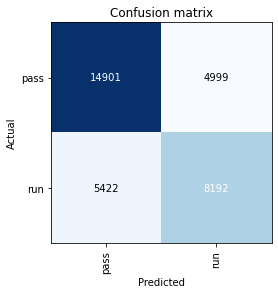

In [73]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [92]:
from sklearn.metrics import roc_curve, auc
probs = (preds[:,1])
# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs)

# Compute ROC area
roc_auc = auc(fpr,tpr)
print(f'ROC area is {roc_auc}')

ROC area is 0.7587140528557286


In [93]:
print(preds)
print(probs)

tensor([[0.8069, 0.1931],
        [0.4246, 0.5754],
        [0.9189, 0.0811],
        ...,
        [0.7266, 0.2734],
        [0.6091, 0.3909],
        [0.4217, 0.5783]])
tensor([0.1931, 0.5754, 0.0811,  ..., 0.2734, 0.3909, 0.5783])


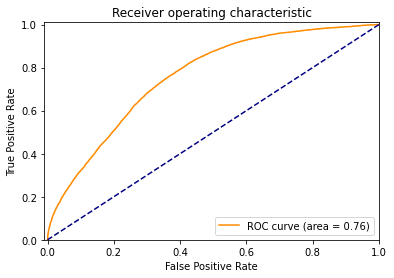

In [94]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


In [123]:
test_df = df.copy()
test_df.drop(['play_type'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=dl)

In [124]:
df['xp'] = preds[0][:,1]

In [126]:

df['play_type_class'] = np.select([df['play_type'] == 'pass', df['play_type'] == 'run'],[1,0], default=0)

df['bin_pred_prob'] = round(df['xp'] / 0.05) * 0.05
# df['situation'] = np.select([(df.down == 1 & df.ydstogo == 10),
#                              (df.down == 2),
#                              (df.down == 3),
#                              (df.down == 4)],
#                             ['1st & 10', '2nd down', '3rd down', '4th down'], default = 'Other')
# df.groupby(['situtation', 'bin_pred_prob']).agg({'play_type_class':[('n_plays','count'),('n_complete', 'sum')]})